In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/tmp/ipykernel_47097/2257463448.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/home/ahojel/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (det

In [2]:
with open('/home/ahojel/visual_prompting_vid/output_dir2/grouped_search_test_subset/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir/doublelayer_1/log.txt', 'r') as file:
    data = file.readlines()


# Convert each line from string to dictionary
data2 = []
for line in data:
    try:
        data2.append(eval(line.strip()))
    except:
        continue


In [3]:
# Create a DataFrame
df = pd.DataFrame(data2)

In [4]:
df[df["baseline"]=="True"]["iou"].mean()

0.39313768114923

In [23]:
df["decoder_type"].astype(int)
df["encoder_type"].astype(int)


ValueError: cannot convert float NaN to integer

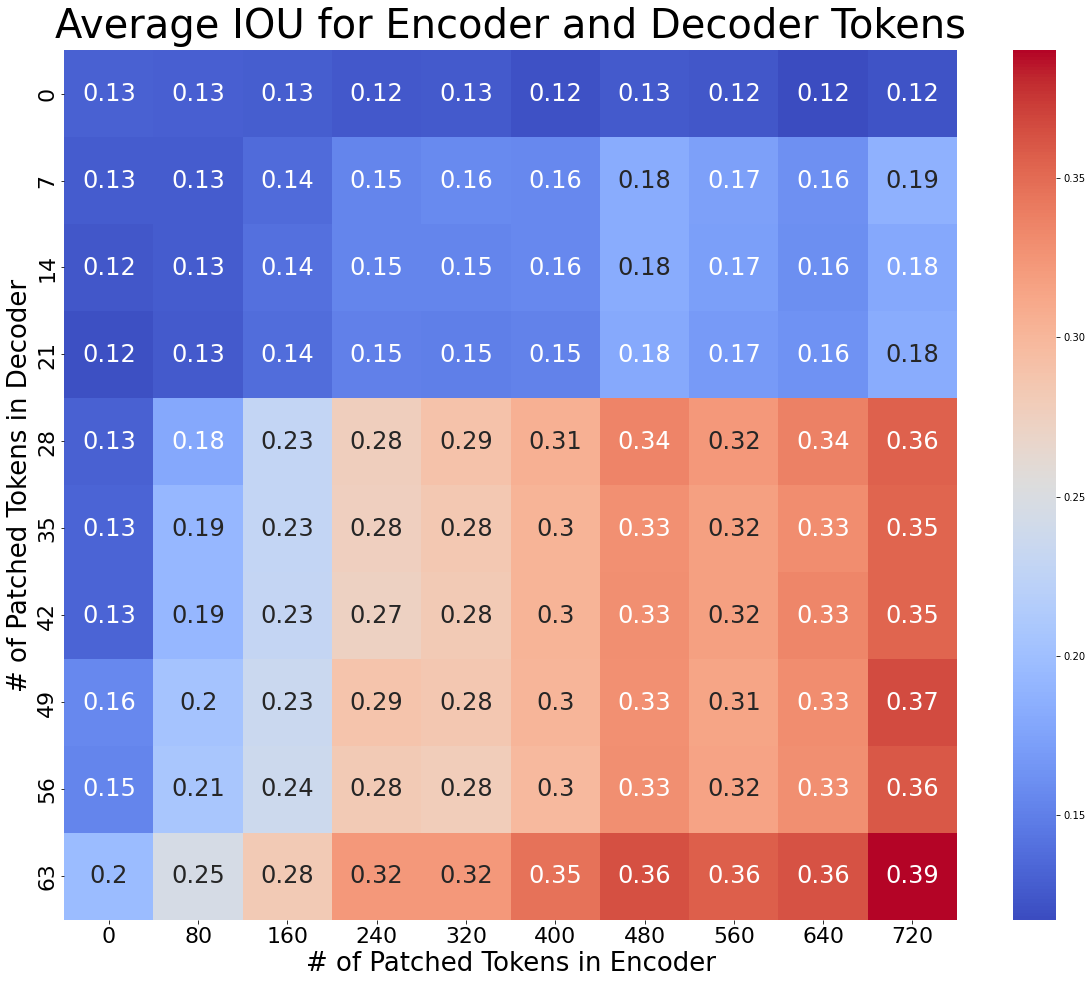

In [5]:
# Filter the dataframe for the task 'segmentation' and ensure 'decoder_type' and 'encoder_type' are integers
seg_df = df[(df["task"] == "segmentation")&(df["baseline"]=="False")].astype({"decoder_type": int, "encoder_type": int})

# Pivot the data to prepare for heatmap, ordering the index and columns, and show only the first 5 rows and 6 columns
pivot_df = seg_df.pivot_table(index='decoder_type', columns='encoder_type', values='iou', aggfunc='mean').sort_index().sort_index(axis=1)#.iloc[:5, :6]

# Plotting the heatmap with larger text
plt.figure(figsize=(20, 16))
heatmap = sns.heatmap(pivot_df, annot=True, cmap='coolwarm', annot_kws={"size": 24})
heatmap.set_title('Average IOU for Encoder and Decoder Tokens', fontdict={'fontsize': 40}, pad=12)
heatmap.set_xlabel('# of Patched Tokens in Encoder', fontsize=26)
heatmap.set_ylabel('# of Patched Tokens in Decoder', fontsize=26)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()


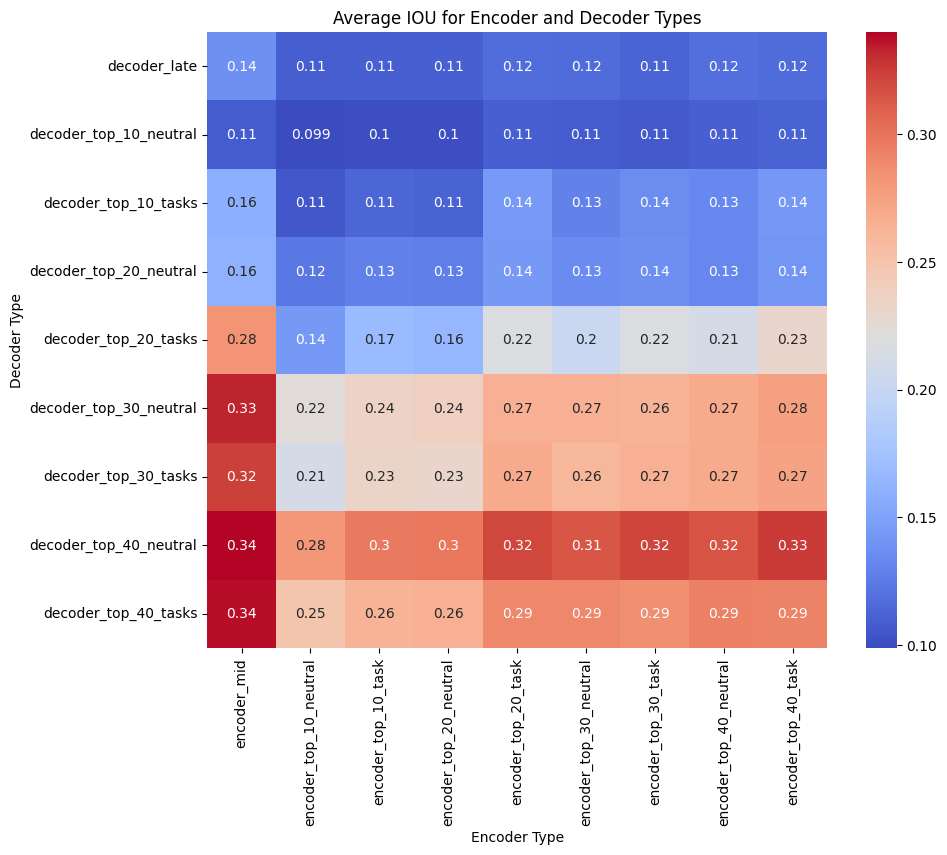

In [26]:
# Filter the dataframe for the task 'segmentation'
seg_df = df[df["task"] == "segmentation"]

# Pivot the data to prepare for heatmap
pivot_df = seg_df.pivot_table(index='decoder_type', columns='encoder_type', values='iou', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm')
plt.title('Average IOU for Encoder and Decoder Types')
plt.xlabel('Encoder Type')
plt.ylabel('Decoder Type')
plt.show()


In [18]:
df[df["baseline"]=="True"]["metric"].mean()

2.179969176706624

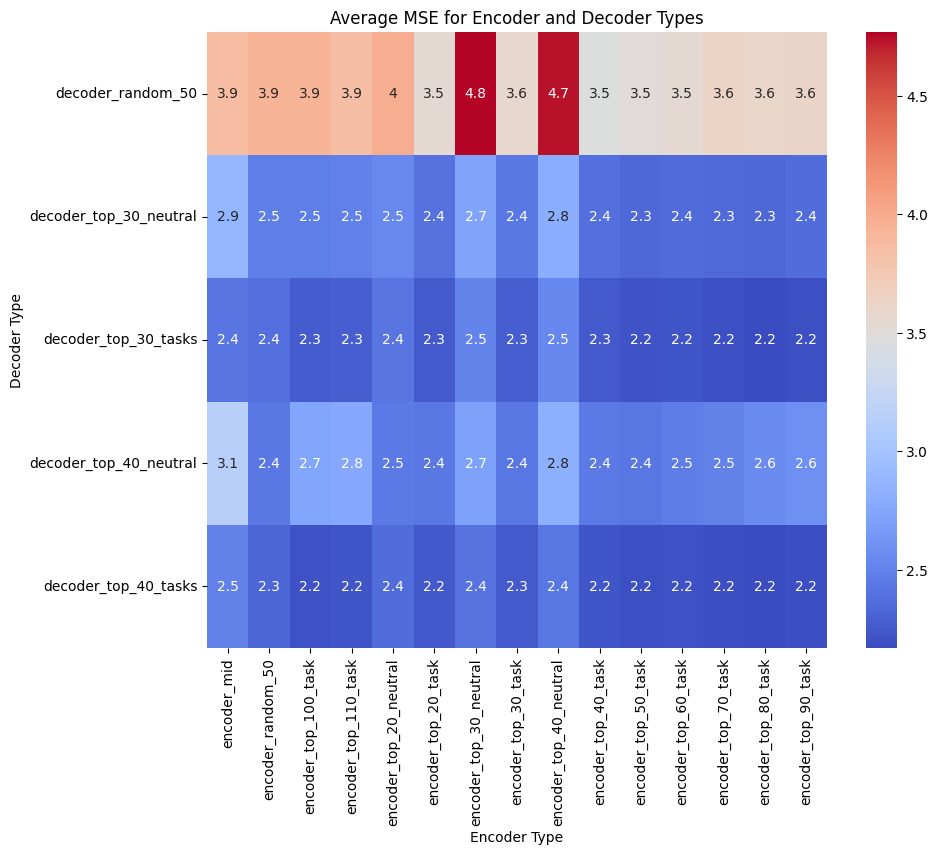

In [33]:
# Filter the dataframe for the task 'segmentation'
seg_df = df[df["task"] == "segmentation"]

# Pivot the data to prepare for heatmap
pivot_df = seg_df.pivot_table(index='decoder_type', columns='encoder_type', values='metric', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm')
plt.title('Average MSE for Encoder and Decoder Types')
plt.xlabel('Encoder Type')
plt.ylabel('Decoder Type')
plt.show()


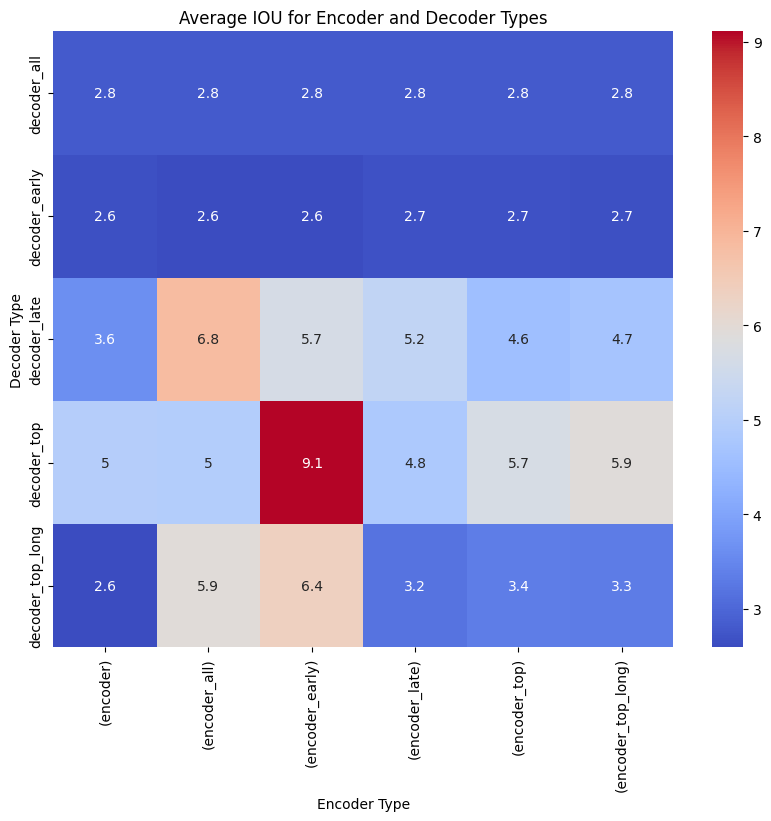

In [9]:
# Filter the dataframe for the task 'segmentation'
seg_df = df[df["task"] == "segmentation"]

# Pivot the data to prepare for heatmap
pivot_df = seg_df.pivot_table(index='decoder_type', columns='encoder_type', values='metric', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm')
plt.title('Average IOU for Encoder and Decoder Types')
plt.xlabel('Encoder Type')
plt.ylabel('Decoder Type')
plt.show()


In [24]:
df[df["baseline"]=="True"]["accuracy"].mean()

0.8721453625048808

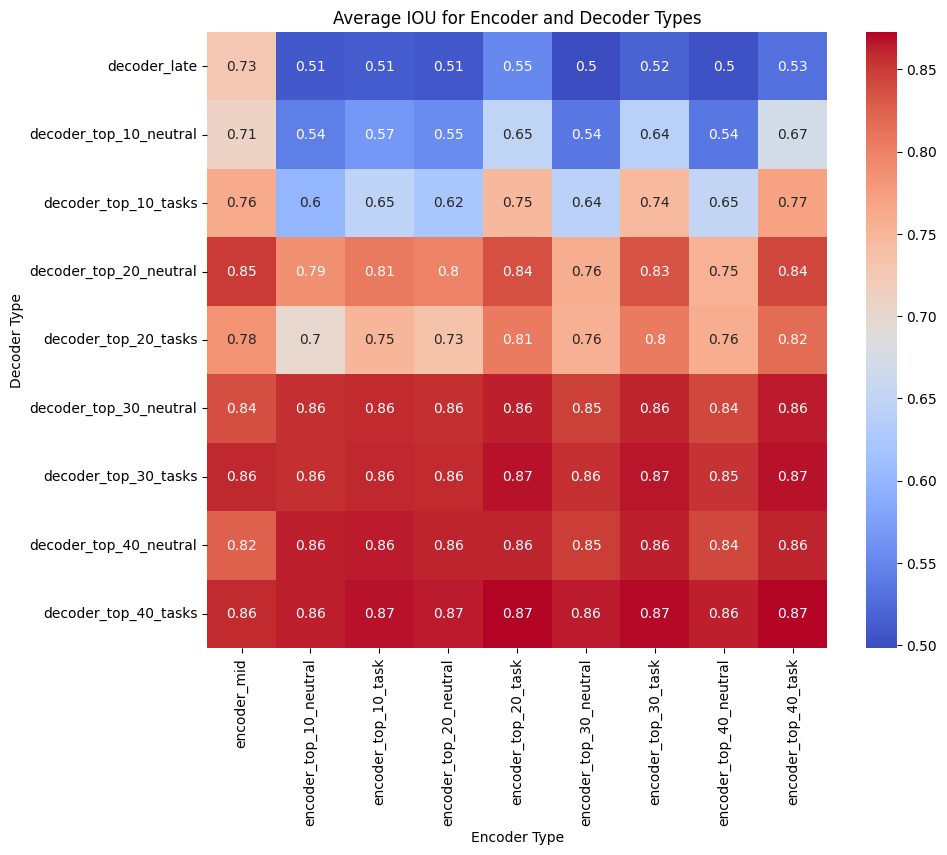

In [25]:
# Filter the dataframe for the task 'segmentation'
seg_df = df[df["task"] == "segmentation"]

# Pivot the data to prepare for heatmap
pivot_df = seg_df.pivot_table(index='decoder_type', columns='encoder_type', values='accuracy', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm')
plt.title('Average IOU for Encoder and Decoder Types')
plt.xlabel('Encoder Type')
plt.ylabel('Decoder Type')
plt.show()


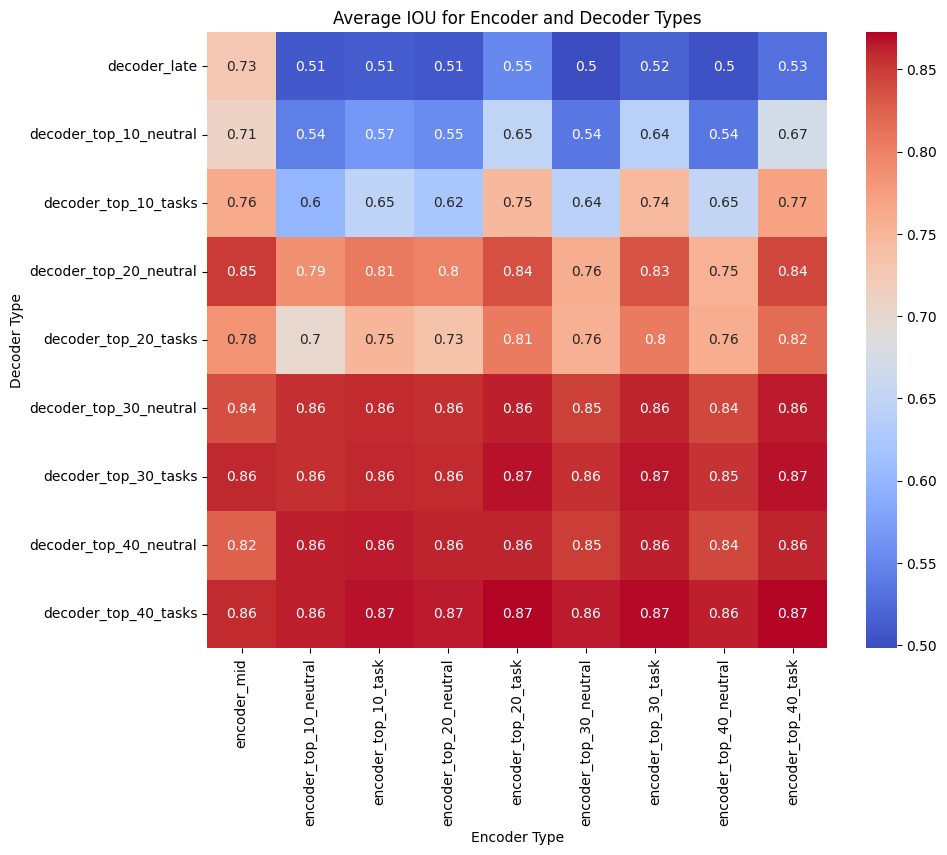

In [21]:
# Filter the dataframe for the task 'segmentation'
seg_df = df[df["task"] == "segmentation"]

# Pivot the data to prepare for heatmap
pivot_df = seg_df.pivot_table(index='decoder_type', columns='encoder_type', values='accuracy', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm')
plt.title('Average IOU for Encoder and Decoder Types')
plt.xlabel('Encoder Type')
plt.ylabel('Decoder Type')
plt.show()


In [22]:
df[df["baseline"]=="True"]["iou"].mean()


0.34577524537298027

In [26]:
# %% cell 7
# Filter the dataframe for the specific conditions
model_df = df[(df["position"]=="neck")&(df["injection"]=="three")&(df["prompt_token"]=="avg_baseline_top_half")]

# Group by 'coeff' and calculate the mean 'iou' for each group
mean_iou_by_coeff = model_df.groupby('coeff')['iou'].mean().reset_index()

# Find the 'coeff' with the highest mean 'iou'
highest_mean_iou = mean_iou_by_coeff.loc[mean_iou_by_coeff['iou'].idxmax()]

# Print the 'coeff' with its corresponding highest mean 'iou'
print(f"The coeff with the highest mean IOU is {highest_mean_iou['coeff']}, with a mean IOU of {highest_mean_iou['iou']:.4f}")
# End of Selection


The coeff with the highest mean IOU is 0.8999999999999999, with a mean IOU of 0.2538


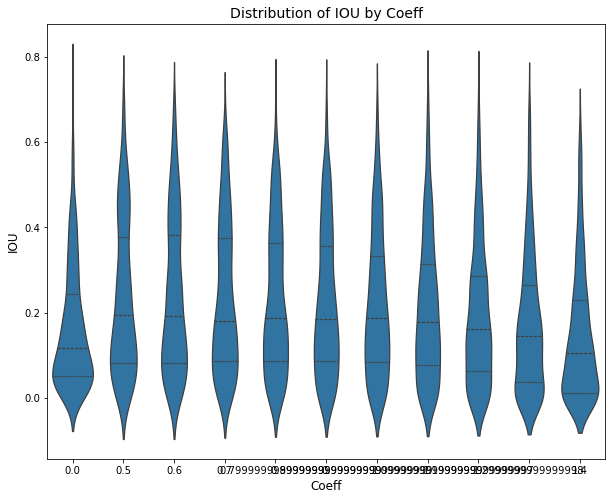

In [24]:
# %% cell 7
model_df = df[(df["position"]=="neck")&(df["injection"]=="top_half")&(df["prompt_token"]=="closest_top_half")]
# Prepare the data for the violin plot
violin_data = model_df[['coeff', 'iou']]

# Setting up the violin plot
fig, ax = plt.subplots(figsize=(10, 8))

# Create the violin plot
sns.violinplot(x='coeff', y='iou', data=violin_data, ax=ax, inner='quartile')

# Set the title and labels for the plot
ax.set_title('Distribution of IOU by Coeff', fontsize=14)
ax.set_xlabel('Coeff', fontsize=12)
ax.set_ylabel('IOU', fontsize=12)

# Display the plot
plt.show()


In [40]:
grouped_df

,tokens,coeff,iou
0,all,0.0,0.109137
1,all,1.0,0.200992
2,all,1.1,0.228837
3,all,1.2,0.251958
4,all,1.3,0.265206
...,...,...,...
305,top_right,3.5,0.160699
306,top_right,3.6,0.160917
307,top_right,3.7,0.160905
308,top_right,3.8,0.160698


In [62]:
grouped_df_max = grouped_df.groupby(['tokens'])['iou'].max().reset_index()
grouped_df_max.columns = ['tokens', 'max_iou']
grouped_df_max = grouped_df_max.merge(grouped_df, how='left', left_on=['tokens', 'max_iou'], right_on=['tokens', 'iou'])
grouped_df_max = grouped_df_max.drop_duplicates(['tokens', 'max_iou'])
grouped_df_max = grouped_df_max.rename(columns={'coeff': 'coeff_at_max'})
grouped_df_max[["tokens", "max_iou", "coeff_at_max"]]

,tokens,max_iou,coeff_at_max
0,all,0.273779,1.5
1,bottom_half,0.130223,1.7
2,bottom_left,0.107839,0.0
3,bottom_right,0.136927,2.5
4,except_bottom_right,0.224984,2.4
5,except_query,0.251995,2.1
6,except_top_left,0.238076,1.4
7,except_top_right,0.116597,2.0
8,left_half,0.107839,0.0
9,right_half,0.253053,2.1


except_top_left
except_top_right
except_query
except_bottom_right


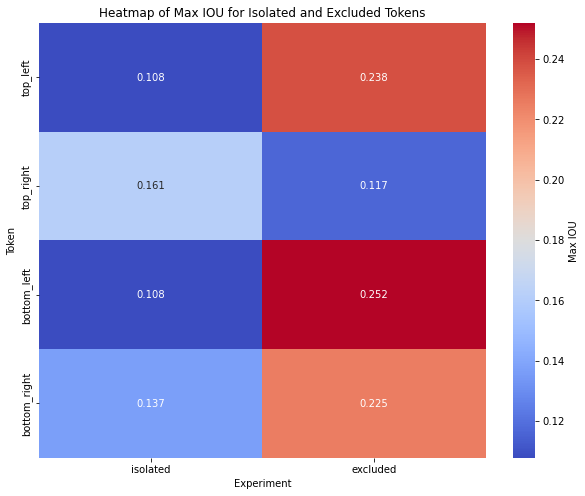

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data for the heatmap
tokens = ['top_left', 'top_right', 'bottom_left', 'bottom_right']
experiments = ['isolated', 'excluded']

# Initialize an empty dataframe to store the heatmap data
heatmap_data = pd.DataFrame(index=tokens, columns=experiments)

# Populate the dataframe with max_iou values for 'isolated' and 'excluded' experiments
for token in tokens:
    isolated_value = grouped_df_max[grouped_df_max["tokens"] == token]["max_iou"].values[0]
    if token == "bottom_left":
        excluded_token = 'except_query'
    else:
        excluded_token = 'except_' + token
    print(excluded_token)
    excluded_value = grouped_df_max[grouped_df_max["tokens"] == excluded_token]["max_iou"].values[0]
    heatmap_data.at[token, 'isolated'] = isolated_value
    heatmap_data.at[token, 'excluded'] = excluded_value

# Convert the dataframe values to float for proper heatmap display
heatmap_data = heatmap_data.astype(float)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="coolwarm", cbar_kws={'label': 'Max IOU'})
plt.title("Heatmap of Max IOU for Isolated and Excluded Tokens")
plt.ylabel("Token")
plt.xlabel("Experiment")
plt.show()


In [151]:
with open('/home/ahojel/visual_prompting_vid/output_dir/maevqgan_tokendrop/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir/doublelayer_1/log.txt', 'r') as file:
    data = file.readlines()


# Convert each line from string to dictionary
data = [eval(line.strip()) for line in data]

df2 = pd.DataFrame(data)

In [152]:
df2

,query_name,support_name,baseline,task,metric,iou,accuracy,dropped_tokens,r_metric,r_iou,r_accuracy
0,2007_000033,2011_002515,True,label_segmentation,1.011990,0.646447,0.933772,NaN,NaN,NaN,NaN
1,2007_000033,2011_002515,True,label_segmentation,1.011990,0.646447,0.933772,NaN,NaN,NaN,NaN
2,2007_000033,2011_002515,True,label_segmentation,1.011990,0.646447,0.933772,NaN,NaN,NaN,NaN
3,2007_000033,2011_002515,True,label_segmentation,1.011990,0.646447,0.933772,NaN,NaN,NaN,NaN
4,2007_000033,2011_002515,True,label_segmentation,1.011990,0.646447,0.933772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2272,2008_004659,2009_003003,True,label_segmentation,2.483347,0.665658,0.856505,NaN,NaN,NaN,NaN
2273,2008_004659,2009_003003,NaN,label_segmentation,6.713195,0.354869,0.498336,top_half,6.753052,0.340471,0.477559
2274,2008_004659,2009_003003,NaN,label_segmentation,3.058946,0.640025,0.815762,top_left,1.947513,0.726852,0.865920
2275,2008_004659,2009_003003,NaN,label_segmentation,6.289332,0.316798,0.508157,top_right,6.416562,0.305919,0.491762


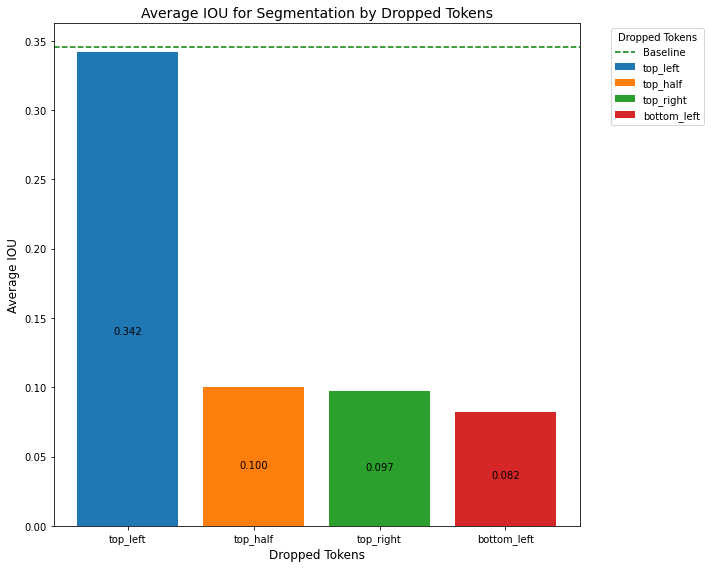

In [153]:
# Filter the dataframe for the task 'label_segmentation'
seg_df = df2[df2["task"] == "label_segmentation"]

# Calculate the baseline IOU
baseline_iou = df2[~df2["baseline"].isna()]["iou"].mean()

# Filter out the baseline data
model_df = df2[df2["baseline"].isna()]

# Group by 'dropped_tokens' and get the average 'iou' for each group
grouped_df = model_df.groupby("dropped_tokens")['iou'].mean().reset_index()

# Sort the grouped dataframe from biggest to smallest average IOU
grouped_df = grouped_df.sort_values('iou', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
# Plot the baseline as a horizontal line
plt.axhline(y=baseline_iou, color='green', linestyle='--', label='Baseline')

# Plot the average IOUs for each dropped-tokens category in descending order
for index, row in grouped_df.iterrows():
    plt.bar(row['dropped_tokens'], row['iou'], label=row['dropped_tokens'])

for rect in bar_plot:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height - rect.get_height() *0.6, f'{height:.3f}', ha='center', va='bottom')

# Set the title and labels for the plot
plt.title('Average IOU for Segmentation by Dropped Tokens', fontsize=14)
plt.xlabel('Dropped Tokens', fontsize=12)
plt.ylabel('Average IOU', fontsize=12)

# Display the legend
plt.legend(title='Dropped Tokens', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

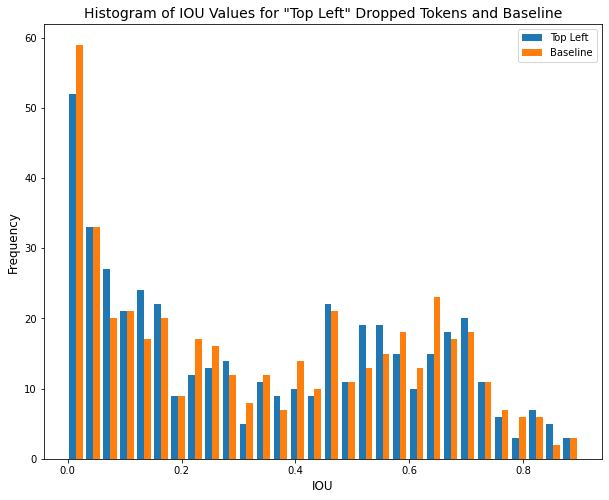

In [144]:
# Filter the dataframe for the task 'label_segmentation'
seg_df = df2[df2["task"] == "label_segmentation"]

# Calculate the baseline IOU
baseline_iou = df2[~df2["baseline"].isna()]["iou"].mean()

# Filter for 'top_left' dropped_tokens and baseline data
top_left_df = df2[(df2["dropped_tokens"] == "top_left") | (~df2["baseline"].isna())]

# Plotting
plt.figure(figsize=(10, 8))
# Plot the histogram of the IOU values for 'top_left' dropped_tokens and baseline
plt.hist([top_left_df[top_left_df["baseline"].isna()]["iou"], 
          top_left_df[~top_left_df["baseline"].isna()]["iou"]], 
         bins=30, label=['Top Left', 'Baseline'])

# Set the title and labels for the plot
plt.title('Histogram of IOU Values for "Top Left" Dropped Tokens and Baseline', fontsize=14)
plt.xlabel('IOU', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the legend
plt.legend()

# Display the plot
plt.show()


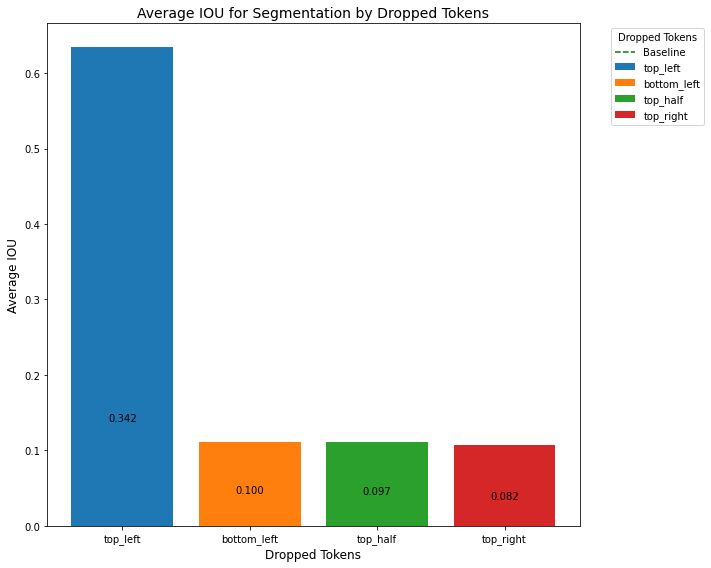

In [139]:
# Filter the dataframe for the task 'label_segmentation'
seg_df = df2[df2["task"] == "label_segmentation"]

# Calculate the baseline IOU
baseline_iou = df2[~df2["baseline"].isna()]["r_iou"].mean()

# Filter out the baseline data
model_df = df2[df2["baseline"].isna()]

# Group by 'dropped_tokens' and get the average 'iou' for each group
grouped_df = model_df.groupby("dropped_tokens")['r_iou'].mean().reset_index()

# Sort the grouped dataframe from biggest to smallest average IOU
grouped_df = grouped_df.sort_values('r_iou', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
# Plot the baseline as a horizontal line
plt.axhline(y=baseline_iou, color='green', linestyle='--', label='Baseline')

# Plot the average IOUs for each dropped-tokens category in descending order
for index, row in grouped_df.iterrows():
    plt.bar(row['dropped_tokens'], row['r_iou'], label=row['dropped_tokens'])

for rect in bar_plot:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height - rect.get_height() *0.6, f'{height:.3f}', ha='center', va='bottom')

# Set the title and labels for the plot
plt.title('Average IOU for Segmentation by Dropped Tokens', fontsize=14)
plt.xlabel('Dropped Tokens', fontsize=12)
plt.ylabel('Average IOU', fontsize=12)

# Display the legend
plt.legend(title='Dropped Tokens', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [24]:
df.groupby(['query_name', 'support_name']).size()


query_name   support_name
2007_000033  2010_003365     466
2007_000061  2008_002504     466
2007_000129  2009_002295     466
2007_000346  2009_002372     416
2007_000529  2008_001580     344
2007_000559  2007_001408     344
2007_000572  2009_000573     344
2007_000762  2007_005428     344
2007_001311  2007_005107     344
2007_001408  2010_001830     344
2007_001568  2010_003716     344
2007_001630  2007_007235     344
2007_001884  2010_001174     344
2007_002266  2007_007341     344
2007_002376  2008_007350     344
2007_002400  2009_003858     344
2007_002619  2007_002266     344
2007_002719  2009_003080     344
2007_003088  2008_007811     344
2007_003131  2007_000529     344
2007_003188  2008_006254     344
2007_003349  2007_008084     344
2007_003571  2007_003131     344
2007_003621  2010_006070     344
2007_003682  2010_005428     344
2007_003861  2010_002150     344
2007_004143  2009_001765     344
2007_004241  2007_002719     310
2007_004468  2010_000426     233
2007_005074  2007

In [69]:
with open('/home/ahojel/visual_prompting_vid/output_dir/double_optimization/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir/doublelayer_1/log.txt', 'r') as file:
    data = file.readlines()


# Convert each line from string to dictionary
data2 = []
for line in data:
    try:
        data2.append(eval(line.strip()))
    except:
        continue

# Create a DataFrame
df = pd.DataFrame(data2)

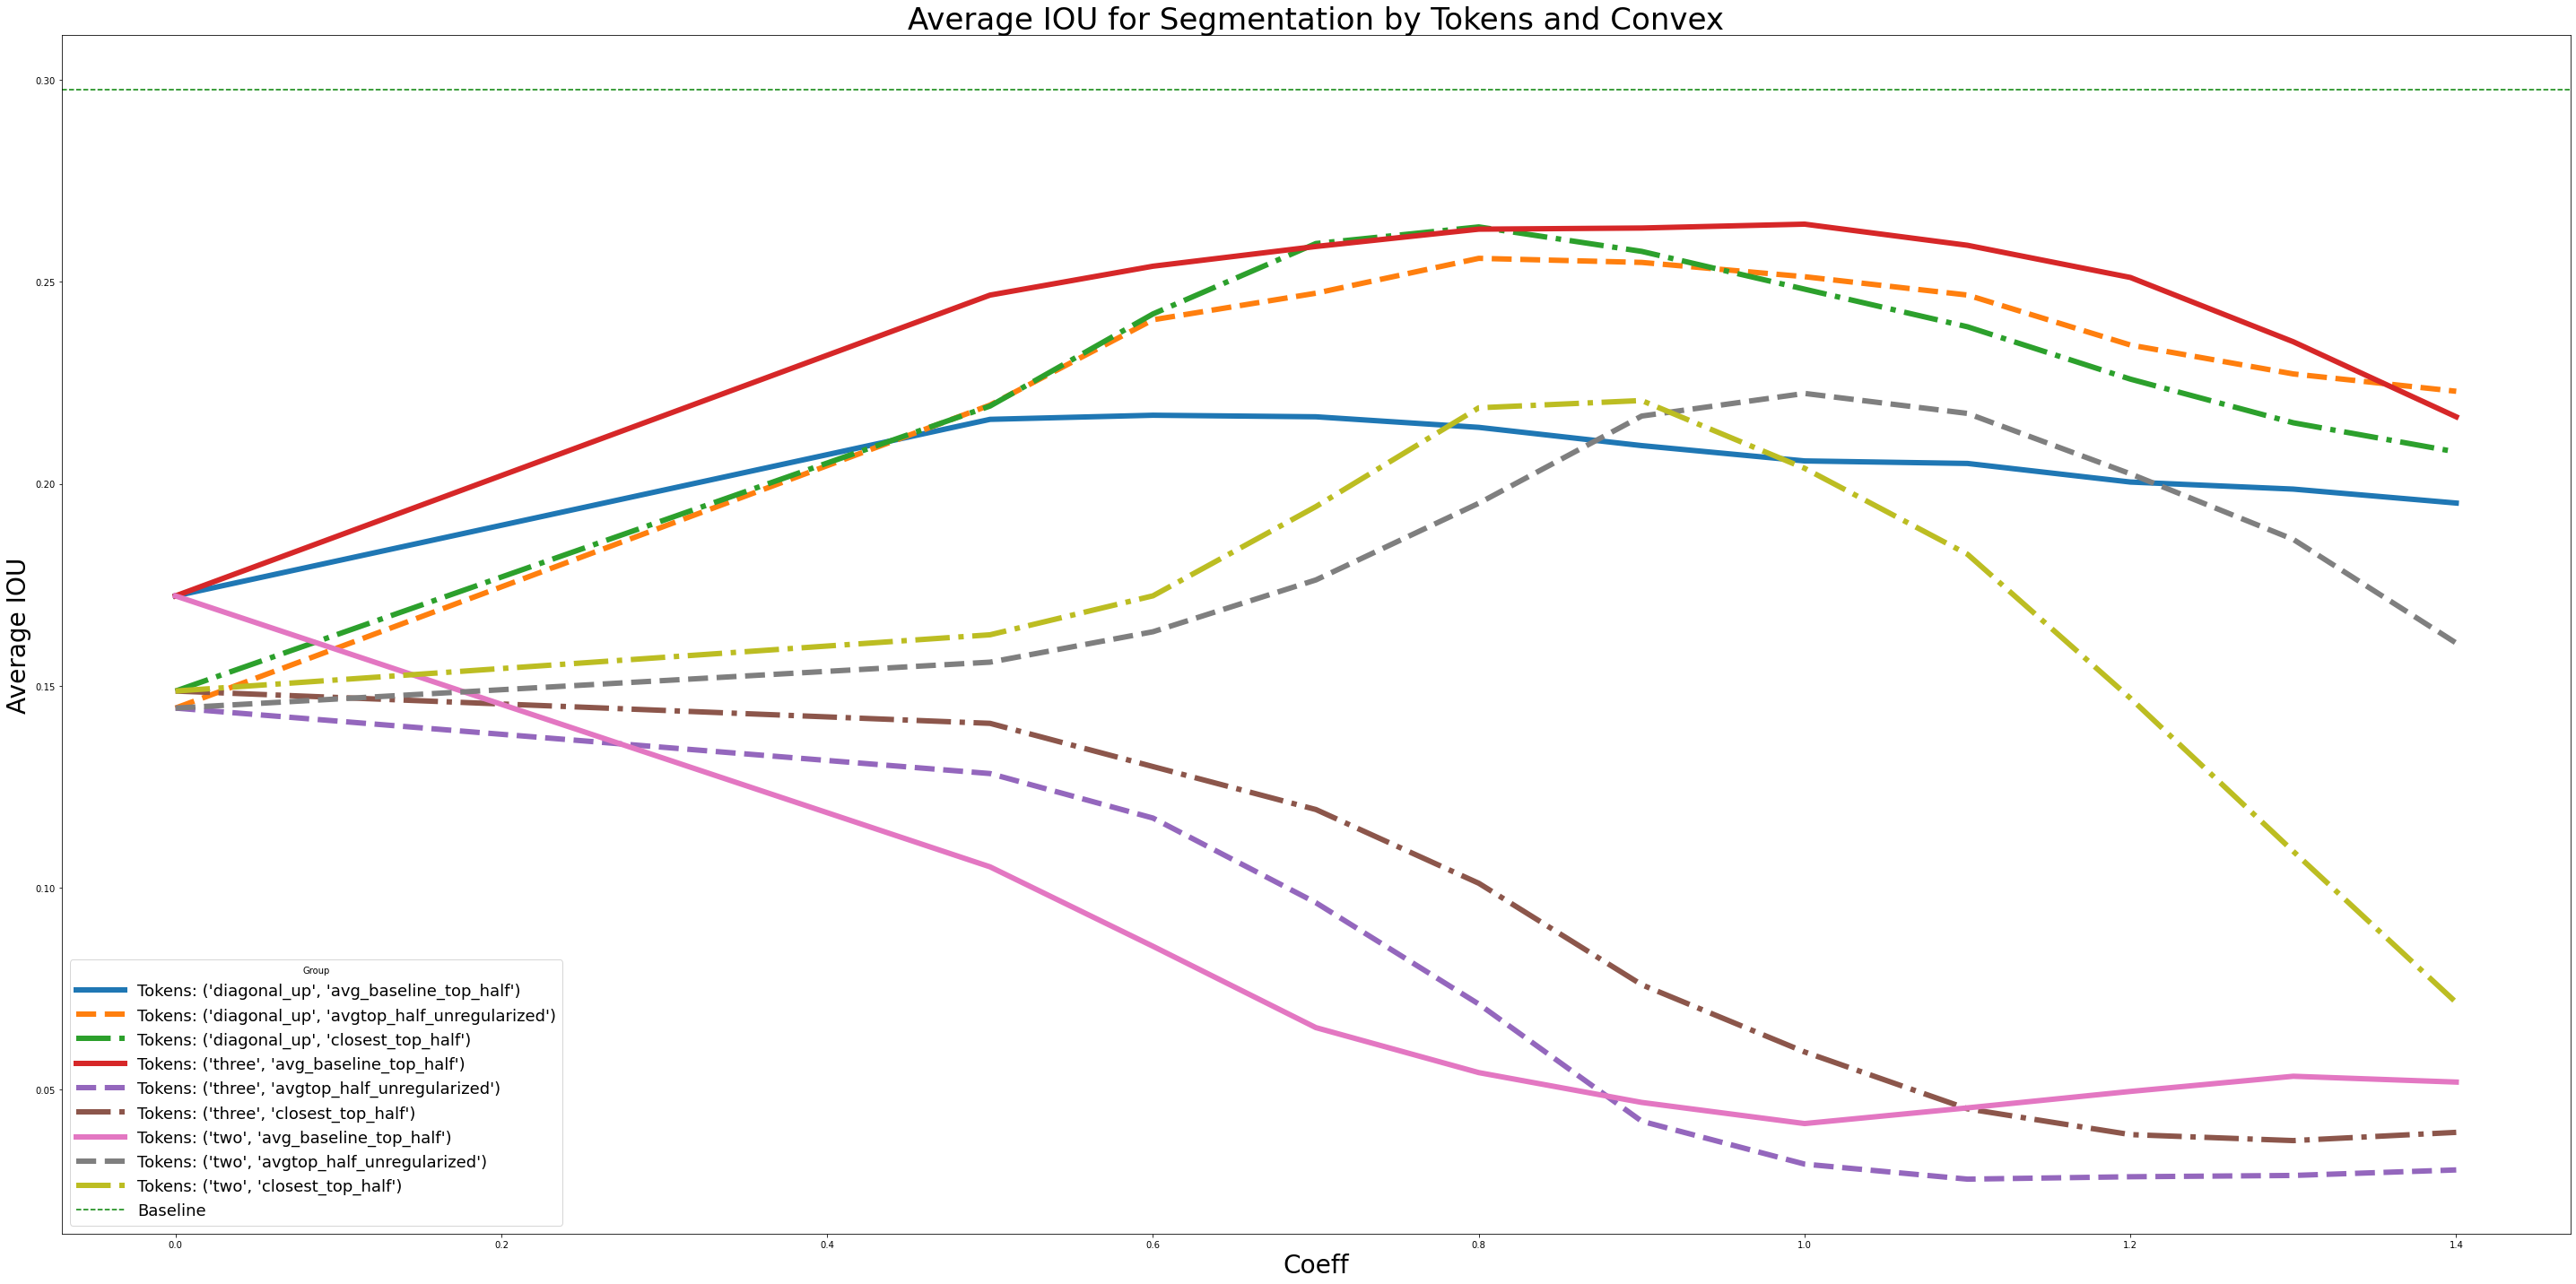

In [70]:
# Filter the dataframe for the task 'label_segmentation'
seg_df = df[df["task"] == "label_segmentation"]

# Calculate the baseline IOU
baseline = df[df["baseline"]=="True"]["iou"].mean()

# Filter out the baseline data
model_df = df[df["baseline"]=="False"]

# Group by 'tokens' and 'coeff', then get the average 'iou' for each group
grouped_df = model_df.groupby(['injection','prompt_token', 'coeff'])['iou'].mean().reset_index()

# Setting up the plot
fig, ax = plt.subplots(figsize=(40, 20))

# Define line styles for unique prompt tokens
line_styles = ['-', '--', '-.', ':']

# Get unique prompt tokens
unique_prompt_tokens = grouped_df['prompt_token'].unique()


# Create a dictionary mapping each unique prompt token to a line style
token_to_style = {token: style for token, style in zip(unique_prompt_tokens, line_styles)}

# Plot each group with specific line style based on unique 'prompt_token'
for name, group in grouped_df.groupby(['injection','prompt_token']):
    linestyle = token_to_style[name[1]]
    ax.plot(np.array(group['coeff']), np.array(group['iou']), label=f'Tokens: {name}', linestyle=linestyle, linewidth=6.0)

# Plot the baseline as a horizontal line
ax.axhline(y=baseline, color='green', linestyle='--', label='Baseline')

# Set the title and labels for the plot
ax.set_title('Average IOU for Segmentation by Tokens and Convex', fontsize=34)
ax.set_xlabel('Coeff', fontsize=28)
ax.set_ylabel('Average IOU', fontsize=28)

# Display the legend
ax.legend(title='Group', fontsize=18, handlelength=3)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [11]:
grouped_df["iou"].max()

0.264293482504

In [12]:
baseline

0.29755783692794

In [94]:
with open('/home/ahojel/visual_prompting_vid/output_dir/tokendrop_restricted1/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir/doublelayer_1/log.txt', 'r') as file:
    data = file.readlines()


# Convert each line from string to dictionary
data2 = []
for line in data:
    try:
        data2.append(eval(line.strip()))
    except:
        continue

# Create a DataFrame
df = pd.DataFrame(data2)

In [95]:
df

,query_name,support_name,baseline,task,metric,iou,accuracy,coeff,injection,prompt_token,drop,r_metric,r_iou,r_accuracy,dropped_tokens
0,2007_000033,2010_003132,True,segmentation,1.505286,0.505981,0.909504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007_000033,2010_003132,False,segmentation,2.816612,0.274856,0.836620,0.0,three,avg_baseline_top_half,True,2.304374,0.245421,0.866245,NaN
2,2007_000033,2010_003132,False,segmentation,2.877491,0.270730,0.832968,0.0,three,avg_baseline_top_half,False,2.337150,0.250339,0.865352,NaN
3,2007_000033,2010_003132,False,segmentation,3.656883,0.341792,0.793686,1.0,three,avg_baseline_top_half,True,3.228679,0.307462,0.812434,NaN
4,2007_000033,2010_003132,False,segmentation,3.134014,0.200526,0.827206,1.0,three,avg_baseline_top_half,False,2.484320,0.163405,0.861213,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2010_004419,2010_002147,NaN,label_segmentation,0.637030,0.697464,0.945784,NaN,NaN,NaN,NaN,0.117049,0.755947,0.958364,top_left
6996,2010_004520,2009_002594,True,label_segmentation,2.475582,0.627870,0.865839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6997,2010_004520,2009_002594,NaN,label_segmentation,2.103062,0.668810,0.878744,NaN,NaN,NaN,NaN,0.446633,0.857437,0.960636,top_left
6998,2010_004529,2009_002749,True,label_segmentation,1.490629,0.598131,0.874361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
both_1

3       0.341792
8       0.132526
13      0.242467
18      0.195049
23      0.173316
          ...   
4978    0.443595
4983    0.527589
4988    0.287745
4993    0.836922
4998    0.644891
Name: iou, Length: 1000, dtype: float64

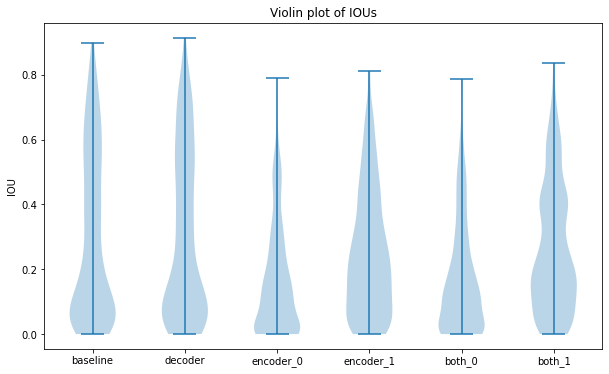

In [89]:
baseline = df[df["baseline"]=="True"]["iou"]
model_df = df[df["baseline"]!="True"]
decoder = model_df[model_df["prompt_token"].isna()]["iou"]
encoder_0 = model_df[(model_df["drop"]=="False")&(model_df["coeff"]==0)]["iou"]
encoder_1 = model_df[(model_df["drop"]=="False")&(model_df["coeff"]==1)]["iou"]
both_0 = model_df[(model_df["drop"]=="True")&(model_df["coeff"]==0)]["iou"]
both_1 = model_df[(model_df["drop"]=="True")&(model_df["coeff"]==1)]["iou"]

data_to_plot = [baseline, decoder, encoder_0, encoder_1, both_0, both_1]
labels = ['baseline', 'decoder', 'encoder_0', 'encoder_1', 'both_0', 'both_1']

plt.figure(figsize=(10,6))
plt.violinplot(data_to_plot)
plt.xticks(np.arange(1, len(labels) + 1), labels)
plt.title('Violin plot of IOUs')
plt.ylabel('IOU')
plt.show()


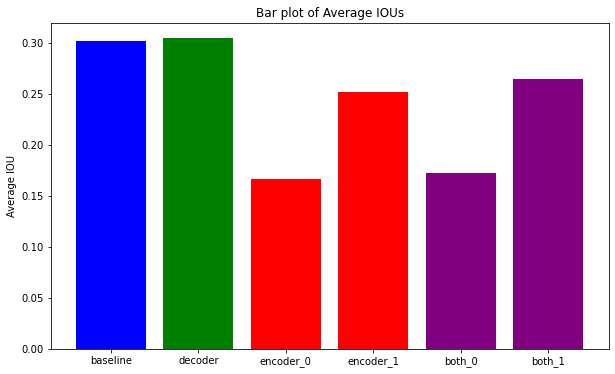

In [97]:
baseline_avg = df[df["baseline"]=="True"]["iou"].mean()
decoder_avg = model_df[model_df["prompt_token"].isna()]["iou"].mean()
encoder_0_avg = model_df[(model_df["drop"]=="False")&(model_df["coeff"]==0)]["iou"].mean()
encoder_1_avg = model_df[(model_df["drop"]=="False")&(model_df["coeff"]==1)]["iou"].mean()
both_0_avg = model_df[(model_df["drop"]=="True")&(model_df["coeff"]==0)]["iou"].mean()
both_1_avg = model_df[(model_df["drop"]=="True")&(model_df["coeff"]==1)]["iou"].mean()

data_to_plot = [baseline_avg, decoder_avg, encoder_0_avg, encoder_1_avg, both_0_avg, both_1_avg]
labels = ['baseline', 'decoder', 'encoder_0', 'encoder_1', 'both_0', 'both_1']
colors = ['blue' if 'baseline' in label else 'green' if 'decoder' in label else 'red' if 'encoder' in label else 'purple' for label in labels]

plt.figure(figsize=(10,6))
plt.bar(labels, data_to_plot, color=colors)
plt.title('Bar plot of Average IOUs')
plt.ylabel('Average IOU')
plt.show()


In [93]:
baseline_avg

0.30163511233042

In [92]:
both_1_avg

0.264293482504

In [66]:
# Filter the dataframe for the task 'label_segmentation'
seg_df = df[df["task"] == "label_segmentation"]

# Calculate the baseline IOU

# Filter out the baseline data

# Group by 'tokens' and 'coeff', then get the average 'iou' for each group
grouped_df = model_df.groupby(['dropped_tokens'])['iou'].mean().reset_index()


In [67]:
baseline

0.30349873078707423

In [68]:
grouped_df

,dropped_tokens,iou
0,top_left,0.306384


In [50]:
baseline

0.29384647299266997

In [51]:
grouped_df

,dropped_tokens,iou
0,top_left,0.29783
